# Customer Churn Data Cleaning and Feature Engineering

This notebook focuses on cleaning and preparing the customer churn dataset from a telecommunications company for predictive modeling. While the previous analysis explored patterns and visualized trends in customer churn, this step ensures that the data is ready for machine learning models.

Key tasks include:

- Detecting and handling outliers in numeric data

- Managing missing values appropriately

- Encoding categorical variables into numeric formats

- Creating new features to enrich the dataset

- Applying transformations, such as logarithmic scaling, to improve data distribution

The final output will be a cleaned and transformed dataset that can be used for predictive modeling, helping the company identify high-risk customers and implement strategies to reduce churn.

In [1]:
import pandas as pd
%matplotlib inline


In [7]:
import pandas as pd
df = pd.read_csv('churn_data.csv', index_col='customerID')
df.tail()

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
6840-RESVB,24,Yes,One year,Mailed check,84.80,1990.50,No
2234-XADUH,72,Yes,One year,Credit card (automatic),103.20,7362.90,No
4801-JZAZL,11,No,Month-to-month,Electronic check,29.60,346.45,No
8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.40,306.60,Yes
3186-AJIEK,66,Yes,Two year,Bank transfer (automatic),105.65,6844.50,No


In [8]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [11]:
churn_df = df[df['Churn'] == 'Yes']
churn_df

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes
9305-CDSKC,8,Yes,Month-to-month,Electronic check,99.65,820.50,Yes
7892-POOKP,28,Yes,Month-to-month,Electronic check,104.80,3046.05,Yes
0280-XJGEX,49,Yes,Month-to-month,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...
1699-HPSBG,12,Yes,One year,Electronic check,59.80,727.80,Yes
8775-CEBBJ,9,Yes,Month-to-month,Bank transfer (automatic),44.20,403.35,Yes
6894-LFHLY,1,Yes,Month-to-month,Electronic check,75.75,75.75,Yes


In [13]:
filtered_df = df[(df['Churn'] == 'Yes') & (df['Contract'] == 'Month-to-month')]
filtered_df

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes
9305-CDSKC,8,Yes,Month-to-month,Electronic check,99.65,820.50,Yes
7892-POOKP,28,Yes,Month-to-month,Electronic check,104.80,3046.05,Yes
0280-XJGEX,49,Yes,Month-to-month,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...
1122-JWTJW,1,Yes,Month-to-month,Mailed check,70.65,70.65,Yes
8775-CEBBJ,9,Yes,Month-to-month,Bank transfer (automatic),44.20,403.35,Yes
6894-LFHLY,1,Yes,Month-to-month,Electronic check,75.75,75.75,Yes


In [16]:
filtered_df_1 = df[(df['Churn'] == 'Yes') & (df['PhoneService'] == 'Yes')]
filtered_df_1

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes
9305-CDSKC,8,Yes,Month-to-month,Electronic check,99.65,820.50,Yes
7892-POOKP,28,Yes,Month-to-month,Electronic check,104.80,3046.05,Yes
0280-XJGEX,49,Yes,Month-to-month,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...
1699-HPSBG,12,Yes,One year,Electronic check,59.80,727.80,Yes
8775-CEBBJ,9,Yes,Month-to-month,Bank transfer (automatic),44.20,403.35,Yes
6894-LFHLY,1,Yes,Month-to-month,Electronic check,75.75,75.75,Yes


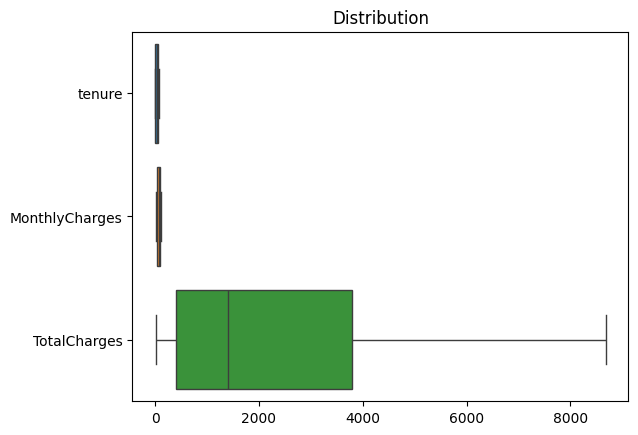

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
subset_df = df[numeric_columns]
ax = sns.boxplot(data=subset_df, orient='h')
plt.title('Distribution')
plt.show()

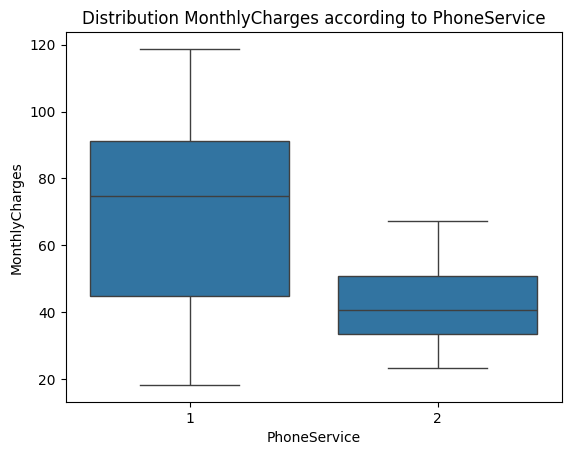

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.boxplot(x='PhoneService', y='MonthlyCharges', data=df)
plt.title('Distribution MonthlyCharges according to PhoneService')
plt.show()

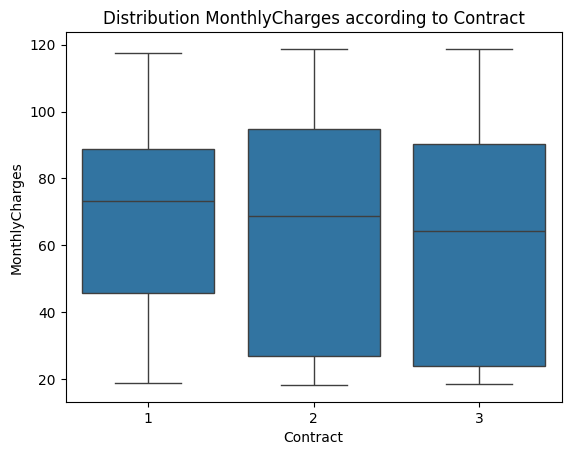

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.boxplot(x='Contract', y='MonthlyCharges', data=df)
plt.title('Distribution MonthlyCharges according to Contract')
plt.show()

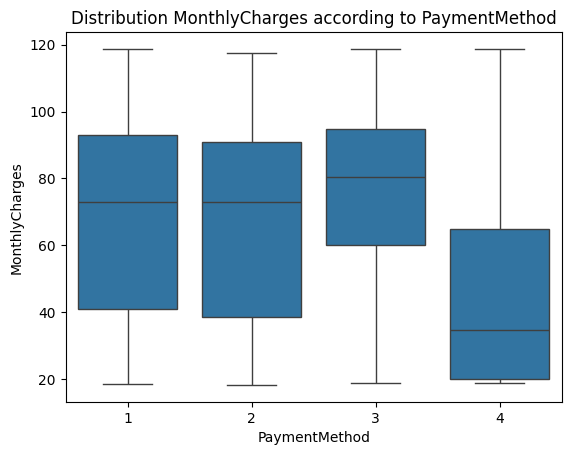

In [70]:
ax = sns.boxplot(x='PaymentMethod', y='MonthlyCharges', data=df)
plt.title('Distribution MonthlyCharges according to PaymentMethod')
plt.show()

In [33]:
churn_distribution = df['Churn'].value_counts()
print(churn_distribution)

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [42]:
missing = df.copy()

missing.loc[df['TotalCharges'] == 1, 'TotalCharges'] = np.nan
missing.isna().sum()

tenure             0
PhoneService       0
Contract           0
PaymentMethod      0
MonthlyCharges     0
TotalCharges      11
Churn              0
dtype: int64

In [63]:
null_total_charges_df = df[df['TotalCharges'].isnull()]
null_total_charges_df

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
4472-LVYGI,0,2,3,1,52.55,NaN,2
3115-CZMZD,0,1,3,4,20.25,NaN,2
5709-LVOEQ,0,1,3,4,80.85,NaN,2
4367-NUYAO,0,1,3,4,25.75,NaN,2
1371-DWPAZ,0,2,3,2,56.05,NaN,2
7644-OMVMY,0,1,3,4,19.85,NaN,2
3213-VVOLG,0,1,3,4,25.35,NaN,2
2520-SGTTA,0,1,3,4,20.00,NaN,2
2923-ARZLG,0,1,2,4,19.70,NaN,2


In [43]:
missing['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [92]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)



In [93]:
missing = df.copy()

missing.loc[df['TotalCharges'] == 1, 'TotalCharges'] = np.nan
missing.isna().sum()

tenure                       0
PhoneService                 0
Contract                     0
PaymentMethod                0
MonthlyCharges               0
TotalCharges                 0
Churn                        0
TotalCharges_tenure_ratio    0
dtype: int64

In [45]:
df['Contract'] = df['Contract'].replace({'Month-to-month': 1, 'One year': 2, 'Two year':3})
df['Contract'].value_counts()

C:\Users\thati\AppData\Local\Temp\ipykernel_32428\1948510617.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Contract'] = df['Contract'].replace({'Month-to-month': 1, 'One year': 2, 'Two year':3})


Contract
1    3875
3    1695
2    1473
Name: count, dtype: int64

In [49]:
df['PhoneService'] = df['PhoneService'].replace({'Yes': 1, 'No': 2})
df['PhoneService'].value_counts()

PhoneService
1    6361
2     682
Name: count, dtype: int64

In [50]:
df['PaymentMethod'] = df['PaymentMethod'].replace({'Bank transfer (automatic)': 1, 'Credit card (automatic)': 2, 'Electronic check': 3, 'Mailed check': 4})
df['PaymentMethod'].value_counts()

PaymentMethod
3    2365
4    1612
1    1544
2    1522
Name: count, dtype: int64

In [51]:
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 2})
df['Churn'].value_counts()

Churn
2    5174
1    1869
Name: count, dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   PhoneService    7043 non-null   int64  
 2   Contract        7043 non-null   int64  
 3   PaymentMethod   7043 non-null   int64  
 4   MonthlyCharges  7043 non-null   float64
 5   TotalCharges    7032 non-null   float64
 6   Churn           7043 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 698.2+ KB


In [77]:
df['TotalCharges_tenure_ratio'] = df['TotalCharges'] / df['tenure']

<Axes: ylabel='Frequency'>

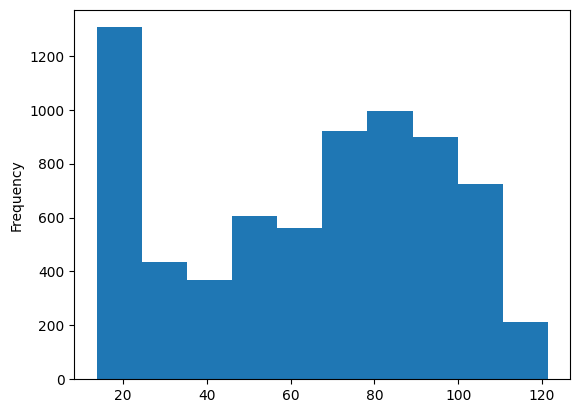

In [78]:
df['TotalCharges_tenure_ratio'].plot.hist()

In [13]:
import pandas as pd
import numpy as np
df = pd.read_csv('churn_data.csv')
df_copy = df.copy()
df_copy['TotalCharges'] = np.log(df_copy['TotalCharges'])

<Axes: ylabel='Frequency'>

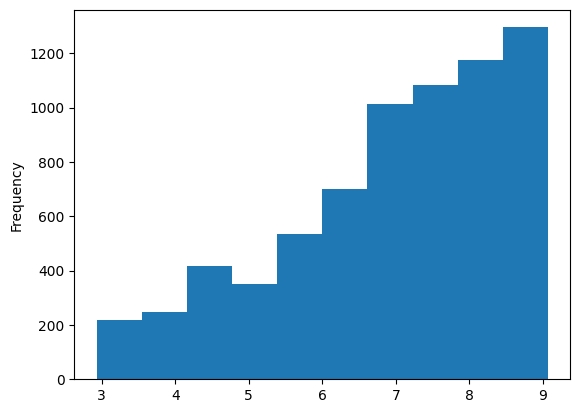

In [14]:
df_copy['TotalCharges'].plot.hist()

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tenure                     7043 non-null   int64  
 1   PhoneService               7043 non-null   int64  
 2   Contract                   7043 non-null   int64  
 3   PaymentMethod              7043 non-null   int64  
 4   MonthlyCharges             7043 non-null   float64
 5   TotalCharges               7043 non-null   float64
 6   Churn                      7043 non-null   int64  
 7   TotalCharges_tenure_ratio  7043 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 753.2+ KB


In [94]:
df.to_csv('new_churn_data_.csv')

# Conclusion

I began by examining the dataset to understand the overall distribution of customer churn. I then checked for outliers in the numeric columns (tenure, MonthlyCharges, and TotalCharges) using the IQR method, and found no atypical values.

Next, I conducted more specific outlier analyses comparing PhoneService, Contract, and PaymentMethod against MonthlyCharges, again finding no unusual patterns. I then reviewed missing values and identified 11 missing entries in TotalCharges. Upon inspection, these corresponded to new customers with zero tenure who had not churned, so I filled the missing values with 0.

I converted the categorical columns (PhoneService, Contract, PaymentMethod, and Churn) to numeric formats. I also created a new feature, TotalCharges_tenure_ratio, and applied a log transformation to the TotalCharges column, generating corresponding plots to visualize the data. Finally, I saved the cleaned and transformed dataset to a CSV file for future modeling.

This process reinforced the importance of careful data cleaning and feature engineering to ensure reliable inputs for predictive modeling.

Maryi Tatiana Palacios Giraldo